In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

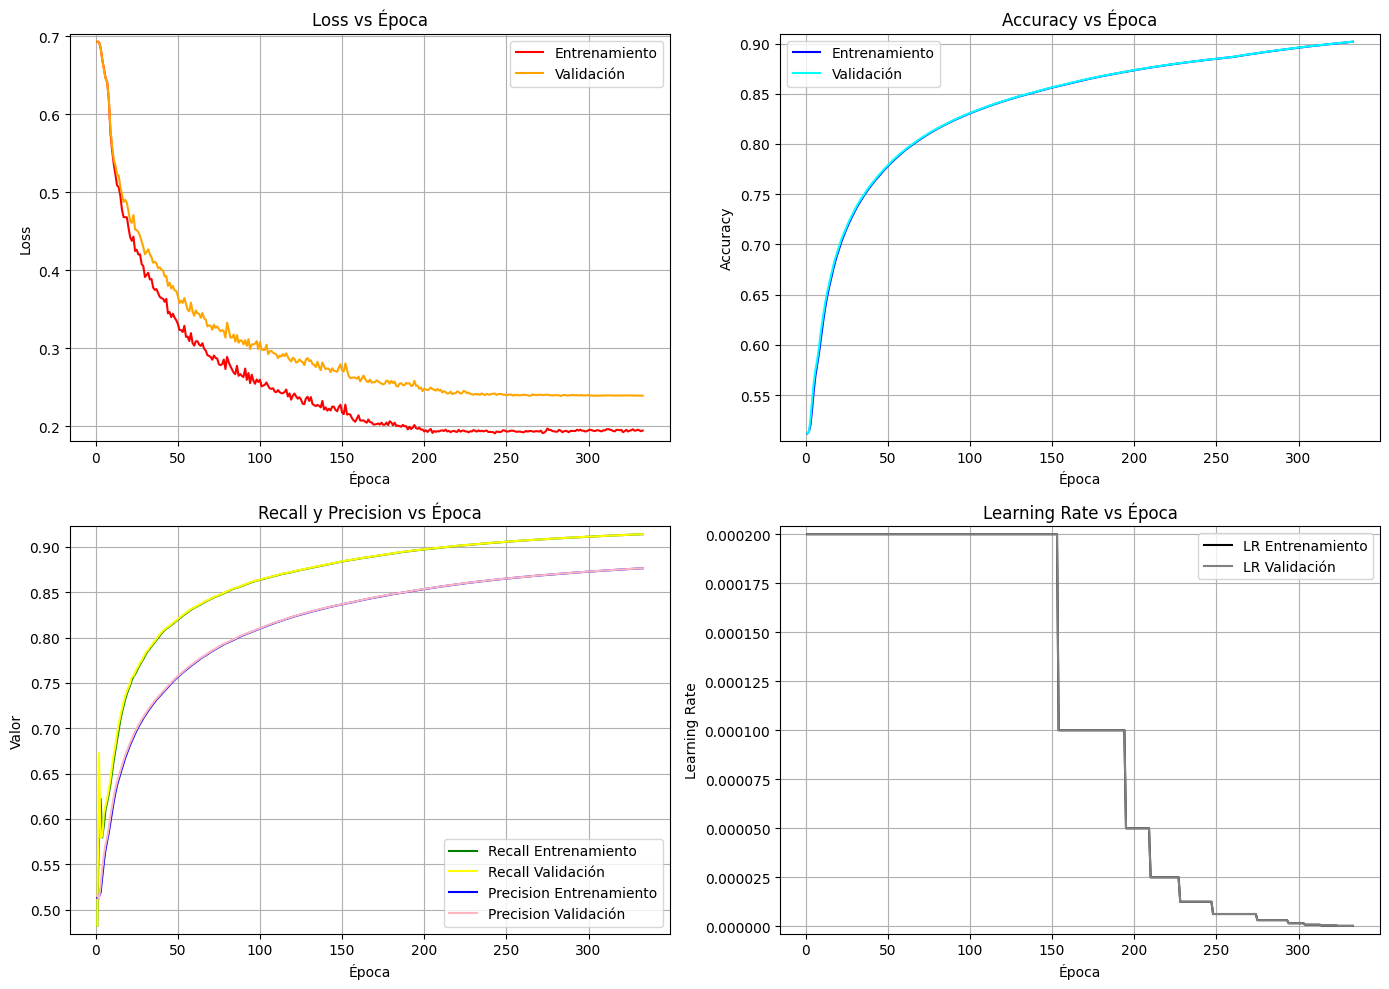

In [104]:
# cargamos los archivos
df_train = pd.read_csv("pesos_siamesa_final_19_enero/entrenamiento.txt")
df_valid = pd.read_csv("pesos_siamesa_final_19_enero/validacion.txt")

# Limpiamos los nombres de las columnas
df_train.columns = df_train.columns.str.strip()
df_valid.columns = df_valid.columns.str.strip()

# Nos aseguraramos que 'epoca' sea entero
df_train["epoca"] = df_train["epoca"].astype(int)
df_valid["epoca"] = df_valid["epoca"].astype(int)

# Función para ampliar los ejes y ver mejor las diferencias
def auto_ylim(series1, series2, margin=0.02):
    min_val = min(series1.min(), series2.min())
    max_val = max(series1.max(), series2.max())
    delta = (max_val - min_val) * margin
    return (min_val - delta, max_val + delta)

# Graficamos
plt.figure(figsize=(14, 10))

# Loss
plt.subplot(2, 2, 1)
plt.plot(df_train["epoca"], df_train["loss"], label="Entrenamiento", color='red')
plt.plot(df_valid["epoca"], df_valid["loss"], label="Validación", color='orange')
plt.title("Loss vs Época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.ylim(*auto_ylim(df_train["loss"], df_valid["loss"]))
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(2, 2, 2)
plt.plot(df_train["epoca"], df_train["accuracy"], label="Entrenamiento", color='blue')
plt.plot(df_valid["epoca"], df_valid["accuracy"], label="Validación", color='cyan')
plt.title("Accuracy vs Época")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.ylim(*auto_ylim(df_train["accuracy"], df_valid["accuracy"]))
plt.legend()
plt.grid(True)

# Recall y Precision
plt.subplot(2, 2, 3)
plt.plot(df_train["epoca"], df_train["recall"], label="Recall Entrenamiento", color='green')
plt.plot(df_valid["epoca"], df_valid["recall"], label="Recall Validación", color='yellow')
plt.plot(df_train["epoca"], df_train["precision"], label="Precision Entrenamiento", color='blue')
plt.plot(df_valid["epoca"], df_valid["precision"], label="Precision Validación", color='lightpink')
plt.title("Recall y Precision vs Época")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.ylim(*auto_ylim(
    pd.concat([df_train["recall"], df_train["precision"]]),
    pd.concat([df_valid["recall"], df_valid["precision"]])
))
plt.legend()
plt.grid(True)

# Learning Rate
plt.subplot(2, 2, 4)
plt.plot(df_train["epoca"], df_train["lr"], label="LR Entrenamiento", color='black')
plt.plot(df_valid["epoca"], df_valid["lr"], label="LR Validación", color='gray')
plt.title("Learning Rate vs Época")
plt.xlabel("Época")
plt.ylabel("Learning Rate")
plt.ylim(*auto_ylim(df_train["lr"], df_valid["lr"]))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



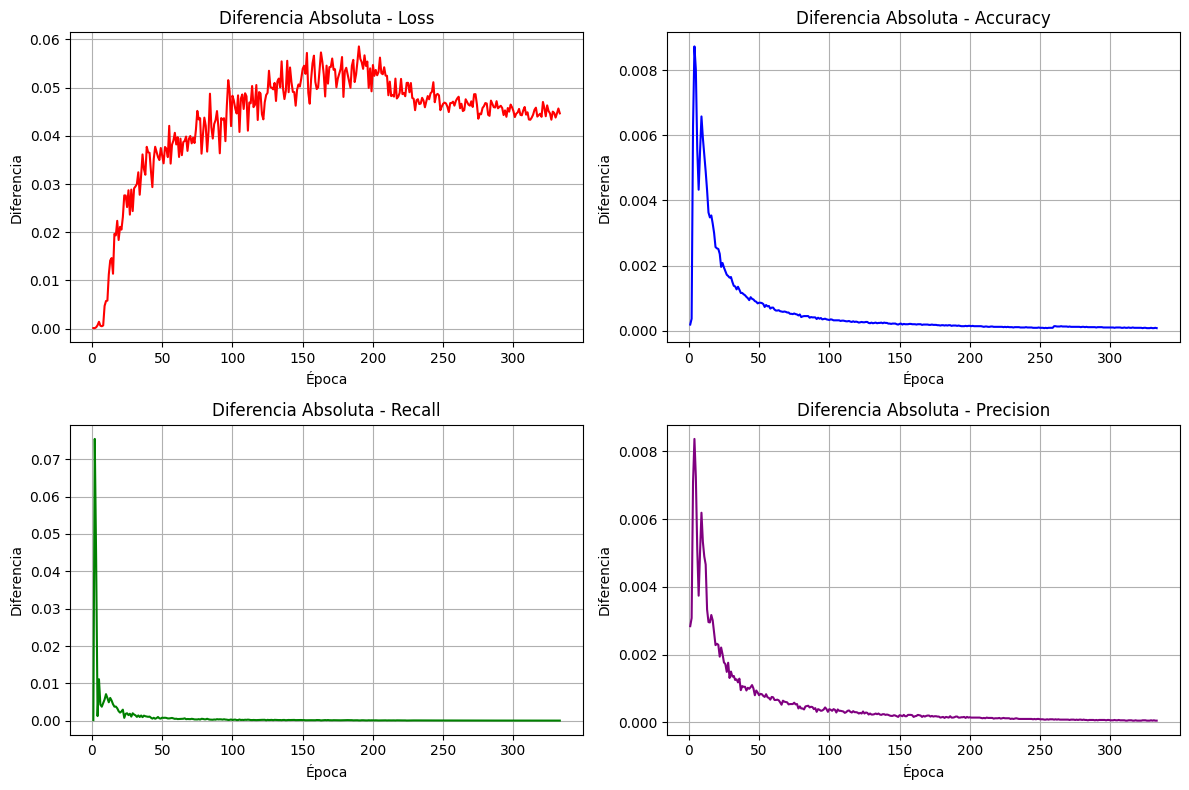

In [105]:
# cargamos los archivos
df_train = pd.read_csv("pesos_siamesa_final_19_enero/entrenamiento.txt")
df_valid = pd.read_csv("pesos_siamesa_final_19_enero/validacion.txt")

# Limpiamos nombres de columnas
df_train.columns = df_train.columns.str.strip()
df_valid.columns = df_valid.columns.str.strip()

# Eliminamos filas que no sean numéricas
df_train = df_train[pd.to_numeric(df_train["epoca"], errors="coerce").notnull()]
df_valid = df_valid[pd.to_numeric(df_valid["epoca"], errors="coerce").notnull()]

# Convertimos las columnas a tipo numérico
for col in ["epoca", "loss", "accuracy", "recall", "precision"]:
    df_train[col] = pd.to_numeric(df_train[col], errors="coerce")
    df_valid[col] = pd.to_numeric(df_valid[col], errors="coerce")

# Calculamos las diferencias absolutas
diff_df = pd.DataFrame({
    "epoca": df_train["epoca"],
    "loss": np.abs(df_valid["loss"] - df_train["loss"]),
    "accuracy": np.abs(df_valid["accuracy"] - df_train["accuracy"]),
    "recall": np.abs(df_valid["recall"] - df_train["recall"]),
    "precision": np.abs(df_valid["precision"] - df_train["precision"]),
})

# Graficamos la diferencia de los valores absolutos
plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(diff_df["epoca"], diff_df["loss"], color='red')
plt.title("Diferencia Absoluta - Loss")
plt.xlabel("Época")
plt.ylabel("Diferencia")
plt.grid(True)

# Accuracy
plt.subplot(2, 2, 2)
plt.plot(diff_df["epoca"], diff_df["accuracy"], color='blue')
plt.title("Diferencia Absoluta - Accuracy")
plt.xlabel("Época")
plt.ylabel("Diferencia")
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(diff_df["epoca"], diff_df["recall"], color='green')
plt.title("Diferencia Absoluta - Recall")
plt.xlabel("Época")
plt.ylabel("Diferencia")
plt.grid(True)

# Precision
plt.subplot(2, 2, 4)
plt.plot(diff_df["epoca"], diff_df["precision"], color='purple')
plt.title("Diferencia Absoluta - Precision")
plt.xlabel("Época")
plt.ylabel("Diferencia")
plt.grid(True)

plt.tight_layout()
plt.show()


#### Hallamos la época en la que se alcanza el menor loss en entrenamiento y validación.

In [106]:

min_loss_row = df_train.loc[df_train["loss"].idxmin()]
epoca_optima = int(min_loss_row["epoca"])

train_metrics = df_train[df_train["epoca"] == epoca_optima][["loss", "accuracy", "precision", "recall"]].iloc[0]

valid_metrics = df_valid[df_valid["epoca"] == epoca_optima][["loss", "accuracy", "precision", "recall"]].iloc[0]

# Imprimimos resultados
print(f"Época con menor loss en entrenamiento: {epoca_optima}")

print("\n--- Entrenamiento ---")
print(f"Loss     : {train_metrics['loss']:.6f}")
print(f"Accuracy : {train_metrics['accuracy']:.6f}")
print(f"Precision: {train_metrics['precision']:.6f}")
print(f"Recall   : {train_metrics['recall']:.6f}")

print("\n--- Validación ---")
print(f"Loss     : {valid_metrics['loss']:.6f}")
print(f"Accuracy : {valid_metrics['accuracy']:.6f}")
print(f"Precision: {valid_metrics['precision']:.6f}")
print(f"Recall   : {valid_metrics['recall']:.6f}")


Época con menor loss en entrenamiento: 243

--- Entrenamiento ---
Loss     : 0.190610
Accuracy : 0.883480
Precision: 0.863630
Recall   : 0.904550

--- Validación ---
Loss     : 0.241740
Accuracy : 0.883580
Precision: 0.863730
Recall   : 0.904620


In [107]:

df_train = pd.read_csv("pesos_siamesa_final_19_enero/entrenamiento.txt")
df_valid = pd.read_csv("pesos_siamesa_final_19_enero/validacion.txt")

df_train.columns = df_train.columns.str.strip()
df_valid.columns = df_valid.columns.str.strip()


cols = ["epoca", "loss", "accuracy", "recall", "precision", "lr"]
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')
df_valid[cols] = df_valid[cols].apply(pd.to_numeric, errors='coerce')


idx_min_val_loss = df_valid["loss"].idxmin()
epoca_min_val_loss = df_valid.loc[idx_min_val_loss, "epoca"]

valid_row = df_valid[df_valid["epoca"] == epoca_min_val_loss].iloc[0]
train_row = df_train[df_train["epoca"] == epoca_min_val_loss].iloc[0]

print(f" Época con menor loss en validación: {epoca_min_val_loss}\n")
print("Validación:")
print(f"  Loss:      {valid_row['loss']:.6f}")
print(f"  Accuracy:  {valid_row['accuracy']:.6f}")
print(f"  Precision: {valid_row['precision']:.6f}")
print(f"  Recall:    {valid_row['recall']:.6f}")

print("\nEntrenamiento:")
print(f"  Loss:      {train_row['loss']:.6f}")
print(f"  Accuracy:  {train_row['accuracy']:.6f}")
print(f"  Precision: {train_row['precision']:.6f}")
print(f"  Recall:    {train_row['recall']:.6f}")


 Época con menor loss en validación: 283

Validación:
  Loss:      0.238520
  Accuracy:  0.892350
  Precision: 0.870390
  Recall:    0.909520

Entrenamiento:
  Loss:      0.194360
  Accuracy:  0.892230
  Precision: 0.870320
  Recall:    0.909460


#### Hallamos la época en la que se obtiene el mayor accuracy en entrenamiento y validación.

In [108]:
df_train = pd.read_csv("pesos_siamesa_final_19_enero/entrenamiento.txt")
df_valid = pd.read_csv("pesos_siamesa_final_19_enero/validacion.txt")


df_train.columns = df_train.columns.str.strip()
df_valid.columns = df_valid.columns.str.strip()


cols = ["epoca", "loss", "accuracy", "recall", "precision", "lr"]
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')
df_valid[cols] = df_valid[cols].apply(pd.to_numeric, errors='coerce')

# Encontrar la época con el máximo accuracy en entrenamiento
idx_max_acc = df_train["accuracy"].idxmax()
epoca_max_acc = df_train.loc[idx_max_acc, "epoca"]

# Obtener métricas para esa época
train_row = df_train[df_train["epoca"] == epoca_max_acc].iloc[0]
valid_row = df_valid[df_valid["epoca"] == epoca_max_acc].iloc[0]

# Mostrar resultados
print(f" Época con mayor accuracy en entrenamiento: {epoca_max_acc}\n")
print("Entrenamiento:")
print(f"  Loss:      {train_row['loss']:.6f}")
print(f"  Accuracy:  {train_row['accuracy']:.6f}")
print(f"  Precision: {train_row['precision']:.6f}")
print(f"  Recall:    {train_row['recall']:.6}")

print("\nValidación:")
print(f"  Loss:      {valid_row['loss']:.6f}")
print(f"  Accuracy:  {valid_row['accuracy']:.6f}")
print(f"  Precision: {valid_row['precision']:.6f}")
print(f"  Recall:    {valid_row['recall']:.6f}")


 Época con mayor accuracy en entrenamiento: 333

Entrenamiento:
  Loss:      0.194280
  Accuracy:  0.901750
  Precision: 0.876340
  Recall:    0.91386

Validación:
  Loss:      0.238950
  Accuracy:  0.901830
  Precision: 0.876390
  Recall:    0.913900


In [109]:
df_train = pd.read_csv("pesos_siamesa_final_19_enero/entrenamiento.txt")
df_valid = pd.read_csv("pesos_siamesa_final_19_enero/validacion.txt")


df_train.columns = df_train.columns.str.strip()
df_valid.columns = df_valid.columns.str.strip()


cols = ["epoca", "loss", "accuracy", "recall", "precision", "lr"]
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')
df_valid[cols] = df_valid[cols].apply(pd.to_numeric, errors='coerce')

# Encontramos la época con el máximo accuracy en validación
idx_max_val_acc = df_valid["accuracy"].idxmax()
epoca_max_val_acc = df_valid.loc[idx_max_val_acc, "epoca"]

valid_row = df_valid[df_valid["epoca"] == epoca_max_val_acc].iloc[0]
train_row = df_train[df_train["epoca"] == epoca_max_val_acc].iloc[0]


print(f"Época con mayor accuracy en validación: {epoca_max_val_acc}\n")
print("Validación:")
print(f"  Loss:      {valid_row['loss']:.6f}")
print(f"  Accuracy:  {valid_row['accuracy']:.6f}")
print(f"  Precision: {valid_row['precision']:.6f}")
print(f"  Recall:    {valid_row['recall']:.6f}")

print("\nEntrenamiento:")
print(f"  Loss:      {train_row['loss']:.6f}")
print(f"  Accuracy:  {train_row['accuracy']:.6f}")
print(f"  Precision: {train_row['precision']:.6f}")
print(f"  Recall:    {train_row['recall']:.6f}")


Época con mayor accuracy en validación: 333

Validación:
  Loss:      0.238950
  Accuracy:  0.901830
  Precision: 0.876390
  Recall:    0.913900

Entrenamiento:
  Loss:      0.194280
  Accuracy:  0.901750
  Precision: 0.876340
  Recall:    0.913860


# Vamos a cargar el modelo y a hacer predicción de la red siamesa sobre algunas imágenes del dataset de validación.

#### Cargamos las bibliotecas necesarias

In [110]:
import os
import random
import numpy as np
from itertools import combinations
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, Accuracy


# Importamos algunas dependencias fundamentales de la API de tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Layer, Lambda, Input, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, concatenate, Dense, Flatten

from tensorflow.keras.preprocessing import image
from keras import backend

#### Definimos las capas necesarias para poder cargar la red siamesa entrenada

In [111]:

def l2_pooling(x):
    # Calculamos el cuadrado de los elementos del tensor
    tensor_cuadrado = tf.square(x)
    # Aplicamos avg_pool2d con kernel size de 3x3, stride de 1 y padding 'SAME'
    l2_pool = tf.nn.avg_pool2d(tensor_cuadrado, ksize=3, strides=1, padding="SAME")
    norm = tf.sqrt(l2_pool + 1e-8) #En principio no parece necesario sumar esta pequeña cantidad
    return norm


# Capa de Normalización L2
class L2(Layer):
    # initialize the layer
    def __init__(self, **kwargs):
        super(L2, self).__init__(**kwargs)
 
    # perform the operation
    def call(self, inputs):
        # computamos los cuadrados
        values = inputs**2.0
        suma = backend.sum(values)
        norma = backend.sqrt(suma)
        norma = backend.maximum(norma, 1.0e-8)
        normalized = inputs / norma
        return normalized
 
    # define the output shape of the layer
    def compute_output_shape(self, input_shape):
        return input_shape

# Creamos una capa personalizada para la distancia L1 de la red siamesa
class L1Dist(Layer):
    
    # Heredamos el método de la clase padre Layer
    def __init__(self, **kwargs):
        super().__init__()
       
    # Definimos lo que ocurre cuando se le pasan datos a la capa personalizada
    def call(self, embedding_imagen1, embedding_imagen2):
        return tf.math.abs(embedding_imagen1 - embedding_imagen2)



#### Cargamos el modelo de red siamesa que fue entrenada previamente para los pesos en los que se obtiene mejor resultado para el loss de validación. EStos pesos son los de la época 283 de entrenamiento.

In [112]:
red_siamesa = tf.keras.models.load_model('./pesos_siamesa_final_19_enero/pesos_siamesa/red_siamesa_epoca_283.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'L2': L2, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})


In [113]:
red_siamesa.summary()

Model: "red_siamesa"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 NN2 (Functional)               (None, 128)          7969264     ['input_img[0][0]',              
                                                                  'validation_img[0][0]'

#### Extraemos el embedding NN2 (de tipo inception) de la red siamesa

In [114]:
embedding_NN2 = Model(inputs=red_siamesa.get_layer('NN2').input, outputs=red_siamesa.get_layer('NN2').output)

In [115]:
embedding_NN2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_7x7_s2 (Conv2D)          (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 maxpool1_3x3_s2 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv1_7x7_s2[0][0]']           
                                                                                            

#### Creamos el dataset de validación y hacemos la inferencia sobre imágenes

In [116]:
tamano_lote = 32

ruta_actual=os.getcwd()
ruta_imagenes_entrenamiento = os.path.join(ruta_actual,"recortes_224","entrenamiento")
ruta_imagenes_validacion = os.path.join(ruta_actual,"recortes_224","test")


def generacion_batch_parejas(ruta_carpeta_persona,ruta_todas_personas,tamano_lote=32):
    numero_personas_dataset = len(os.listdir(ruta_todas_personas))
    contador = 0
    parejas = []
    imagenes_persona = os.listdir(ruta_carpeta_persona)
    numero_imagenes_persona = len(imagenes_persona)
    
    # No hace falta baraja el dataset de las imágenes de la persona
    #random.shuffle(imagenes_persona)

    #Generamos un número natural aleatorio entre 0 y tamano_lote el cual indica los casos positivos
    numero_casos_positivos = random.randint(0, tamano_lote)
    numero_casos_negativos = tamano_lote-numero_casos_positivos

    #Vamos a tomar el mismo número de casos positivos y negativos en el lote de imágenes
    #numero_casos_positivos = tamano_lote//2
    #numero_casos_negativos = tamano_lote-numero_casos_positivos
    
    #Generamos parejas de imágenes de la misma persona (las imágenes tienen que ser aleatorias porque hemos barajado las mismas)

    for i in range(numero_casos_positivos):
        #Generamos dos números aleatorios entre 0 y el número de fotos de la persona-1 (De esta manera no hace falta barajar el dataset)
        numero_1 = random.randint(0, numero_imagenes_persona-1)
        numero_2 = random.randint(0, numero_imagenes_persona-1)
        
        parejas.append([os.path.join(ruta_carpeta_persona,imagenes_persona[numero_1]),os.path.join(ruta_carpeta_persona,imagenes_persona[numero_2]),1.0])

    
    nombre_carpeta_actual = os.path.basename(ruta_carpeta_persona)
    
    etiquetas_personas = os.listdir(ruta_todas_personas)
    etiquetas_personas.remove(nombre_carpeta_actual)

    ###Nuevo #Calculamos tamano números naturales aleatorios en el rango 0 a numero_personas_entrenamiento-1 como tamano_lote - numero_casos_positivos
    lista_numeros_aleatorios =  [random.randint(0, numero_personas_dataset-2) for _ in range(numero_casos_negativos)]

    #print(lista_numeros_aleatorios)
    #print(len(etiquetas_personas))
    for numero in lista_numeros_aleatorios:

        ruta_persona_aleatoria = os.path.join(ruta_todas_personas,etiquetas_personas[numero])
        lista_imagenes_persona_aleatoria = os.listdir(ruta_persona_aleatoria)
        numero_imagenes_persona_aleatoria = len(lista_imagenes_persona_aleatoria)

        #seleccionamos un número aleatorio para elegir la imagen de la persona negativa y otro número aleatorio para elegir la imagen positiva
        numero_imagen_positiva = random.randint(0, numero_imagenes_persona-1)
        numero_imagen_negativa = random.randint(0, numero_imagenes_persona_aleatoria-1)

        #Añadimos la pareja adecuada
        parejas.append([os.path.join(ruta_carpeta_persona,imagenes_persona[numero_imagen_positiva]),
        os.path.join(ruta_todas_personas,etiquetas_personas[numero],lista_imagenes_persona_aleatoria[numero_imagen_negativa]),0.0])

    #Barajamos las parejas
    random.shuffle(parejas)

    #Transformamos la lista en un array de numpy
    parejas = np.array(parejas)
    #Transformamos las lista con los elementos a un dataset válido usando la api de tensorflow
    img1 = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(parejas[:,0]))
    img2 = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(parejas[:,1]))
    etiqueta = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(parejas[:,2],dtype=tf.float32)) 
    
    dataset = tf.data.Dataset.zip((img1, img2, etiqueta))
    
    return dataset


def generacion_dataset(ruta_dataset,tamano_lote = 32):
    booleano = True
    lista_carpetas_personas = os.listdir(ruta_dataset)
    
    for carpeta_persona in lista_carpetas_personas:
        if booleano == True:
            dataset = generacion_batch_parejas(os.path.join(ruta_dataset,carpeta_persona),ruta_dataset,tamano_lote)
            booleano = False
        else:
            dataset_inicial = generacion_batch_parejas(os.path.join(ruta_dataset,carpeta_persona),ruta_dataset,tamano_lote)
            dataset = dataset.concatenate(dataset_inicial)

    return dataset

def preprocesamiento(ruta_imagen):    
    # Leemos la imagen desde su ruta (en formato de bytes)
    byte_img = tf.io.read_file(ruta_imagen)
    # Decodificamos la imagen
    imagen = tf.io.decode_jpeg(byte_img)

    # NO hace falta hacer el resize de la imagen
    #imagen = tf.image.resize(imagen, (105,105))

    # Convertimos la imagen a tipo float32
    imagen = tf.cast(imagen, tf.float32)
    
    # Reescalamos el valor de los píxeles para que esté entre 0 y 1 (Esta normalización es útil para acelerar el entrenamiento) 
    imagen = imagen / 255.0
    
    # Devolvemos la imagen 
    return imagen

def preprocesamiento_elemento_dataset(imagen1, imagen2, etiqueta):
    return(preprocesamiento(imagen1), preprocesamiento(imagen2), etiqueta)

def crear_dataset(ruta, tamano_lote = 32):
    dataset = generacion_dataset(ruta,tamano_lote)
    dataset = dataset.map(preprocesamiento_elemento_dataset)

    #Quité esta línea (me parece que puede estar dando problemas)
    #dataset = dataset.cache()
    
    dataset = dataset.batch(tamano_lote)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset


#### Creamos ahora el dataset de validación y un iterador sobre los lotes:

In [117]:
dataset_validacion = crear_dataset(ruta_imagenes_validacion,tamano_lote=32)

iterador= iter(dataset_validacion)

#### Mostramos ejemplos de los resultados sobre 16 parejas de imágenes de un lote

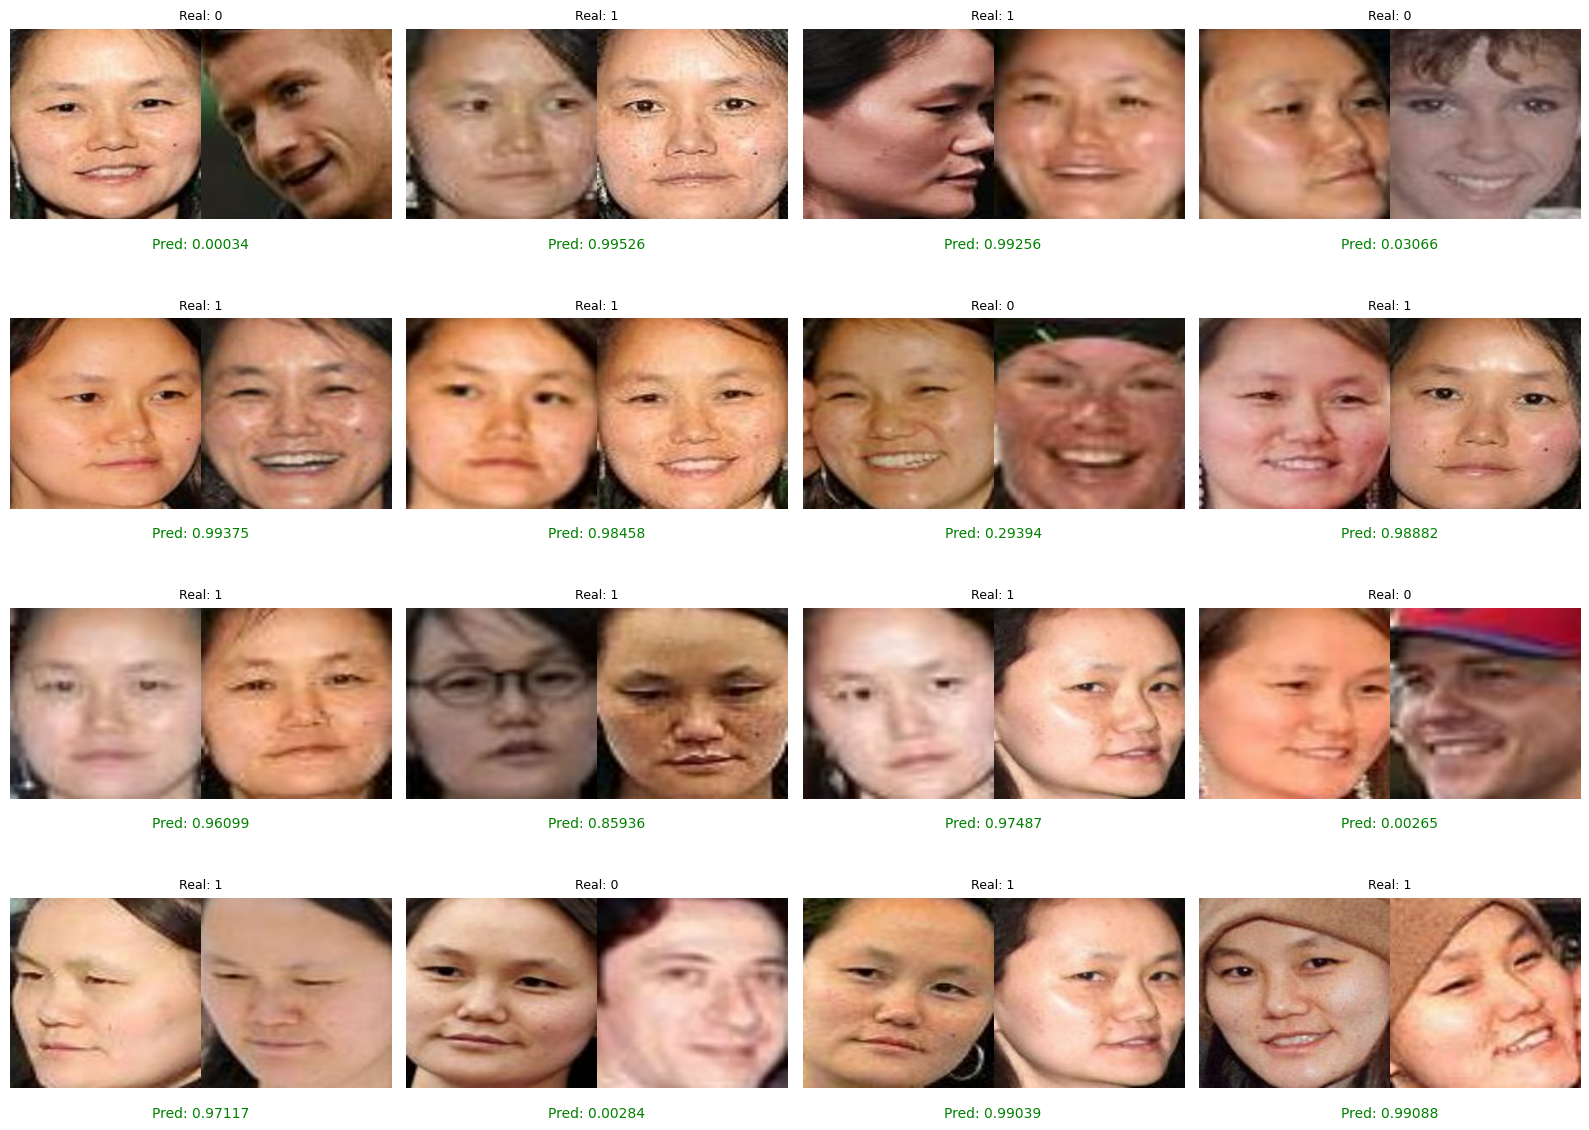

In [118]:

#Se toma un lote de imágenes del dataset de validación
img1_lote, img2_lote, etiquetas_lote = next(iterador)

# Hacemos predicciones
predicciones = red_siamesa([img1_lote, img2_lote], training=False)
predicciones = tf.squeeze(predicciones)
etiquetas = tf.squeeze(etiquetas_lote)

# Mostramos 16 parejas en 4 filas × 4 columnas junto con la etiqueta real y las predicciones del modelo
num_parejas = 16
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

for i in range(num_parejas):
    fila = i // 4
    columna = i % 4
    ax = axes[fila, columna]

    # Obtenemos imágenes
    img1 = img1_lote[i].numpy().squeeze()
    img2 = img2_lote[i].numpy().squeeze()

    # Combinamos en horizontal las parejas de imágenes
    combined = tf.concat([img1, img2], axis=1)

    # Mostramos las parejas de imágens
    ax.imshow(combined, cmap='gray')
    ax.axis('off')

    # Valores de 
    pred = float(predicciones[i].numpy())
    label = int(etiquetas[i].numpy())
    correct = (pred > 0.5) == (label == 1)
    color = "green" if correct else "red"

    # Mostramos la predicción encima de la imagen
    ax.text(
        0.5, -0.15, f"Pred: {pred:.5f}",
        transform=ax.transAxes,
        fontsize=10,
        color=color,
        ha='center'
    )

    # Mostrar etiqueta real debajo de la imagen
    ax.text(
        0.5, 1.05, f"Real: {label}",
        transform=ax.transAxes,
        fontsize=9,
        color='black',
        ha='center'
    )

plt.tight_layout()
plt.show()

#### Se muestran a continuación ejemplos de 4 aciertos y cuatro fallos del modelo de red siamesa

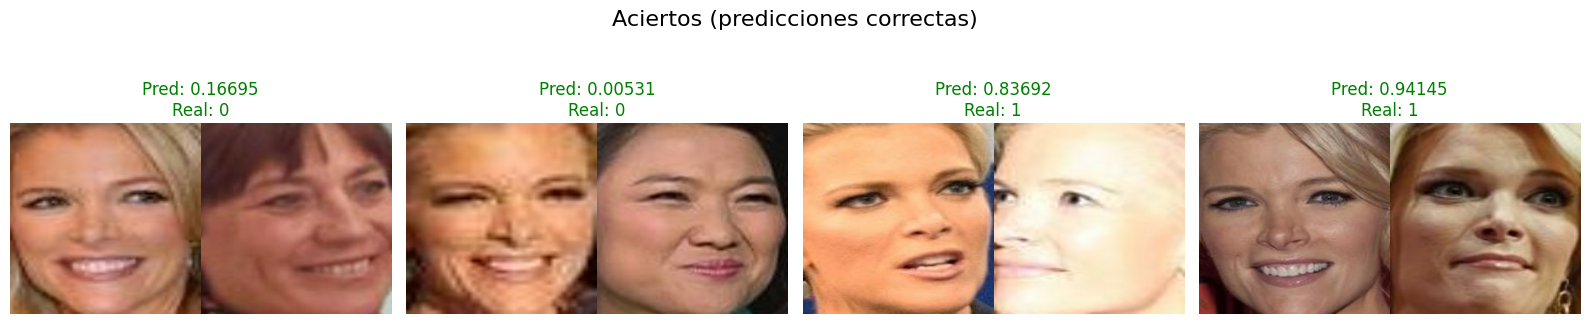

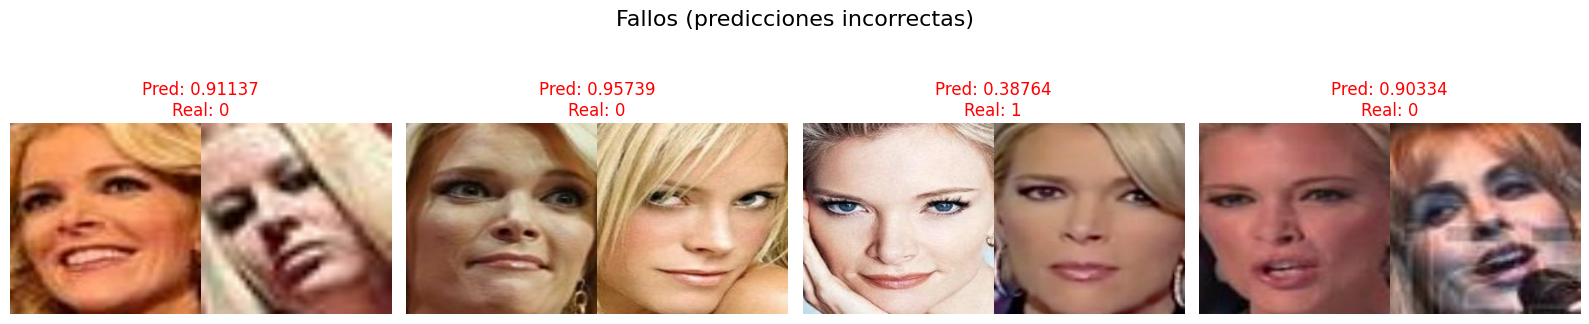

In [119]:

# Se toma otro lote de parejas de imágenes del dataset
img1_lote, img2_lote, etiqueta_lote = next(iterador)

# Se hace inferencia sobre parejas de imágenes usando la red siamesa entrenada
predicciones = tf.squeeze(red_siamesa([img1_lote, img2_lote], training=False))
etiquetas = tf.squeeze(etiqueta_lote)

# Se redondean las predicciones
predicciones_binarias = tf.cast(predicciones > 0.5, tf.int32)
etiquetas_enteras = tf.cast(etiquetas, tf.int32)

# Se identifican errores y fallos cometidos por nuestro modelo de red siamesa 
correctos = tf.where(predicciones_binarias == etiquetas_enteras)[:, 0]
errores = tf.where(predicciones_binarias != etiquetas_enteras)[:, 0]

# Se seleccionan 4 parejas de imágenes en las que el modelo acerto y 4 parejas de imágenes en las que el modelo fallo.

indices_aciertos = correctos[:4].numpy()
indices_fallos = errores[:4].numpy()

# Ahora mostramos parejas de aciertos y fallos del modelo
def mostrar_parejas(indices, titulo):
    n = len(indices)
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))
    if n == 1:
        axes = [axes]

    for i, idx in enumerate(indices):
        img1 = img1_lote[idx].numpy().squeeze()
        img2 = img2_lote[idx].numpy().squeeze()
        combinada = tf.concat([img1, img2], axis=1)

        pred = float(predicciones[idx].numpy())
        label = int(etiquetas[idx].numpy())
        color = "green" if (pred > 0.5) == (label == 1) else "red"

        axes[i].imshow(combinada, cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Pred: {pred:.5f}\nReal: {label}", color=color)

    fig.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()

# Se visualizan aciertos y fallos de la red siamesa
mostrar_parejas(indices_aciertos, "Aciertos (predicciones correctas)")
mostrar_parejas(indices_fallos, "Fallos (predicciones incorrectas)")
